In [ ]:
# pip install selenium

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
from selenium import webdriver
from tqdm import tqdm
from konlpy.tag import Twitter
from collections import Counter
import pandas as pd
import numpy as np
import time
import re

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

In [2]:
def get_crawl(keyword, len_crawling):

    # url 열기
    url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

    chrome_driver_path = "./chromedriver"
    driver = webdriver.Chrome(chrome_driver_path)
    driver.get(url)
    time.sleep(3)

    login_section = '//*[@id="react-root"]/section/nav/div[2]/div/div/div[3]/div/span/a[1]/button'
    driver.find_element_by_xpath(login_section).click()
    time.sleep(1)

    # 인스타그램 아이디 / 비밀번호ㅍ(입력요구)
    instagram_id = 
    instagram_pw = 

    elem_login = driver.find_element_by_name("username")
    elem_login.clear()
    elem_login.send_keys(instagram_id)

    elem_login = driver.find_element_by_name('password')
    elem_login.clear()
    elem_login.send_keys(instagram_pw)

    time.sleep(1)

    xpath = '/html/body/div[1]/section/main/div/article/div/div[1]/div/form/div/div[3]/button/div'
    driver.find_element_by_xpath(xpath).click()
    time.sleep(3)

    driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click()
    time.sleep(5)

    # //*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]
    # /html/body/div[1]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]

    driver.find_element_by_xpath('/html/body/div[1]/section/main/article/div[1]/div/div/div[1]/div[1]/a/div[1]/div[2]').click()

    # len_crawling = 15000
    print('총 {0}개의 데이터를 수집합니다.'.format(len_crawling))

    # 해쉬태그를 담을 리스트 
    csvtext = []
    time.sleep(2)

    for i in tqdm(range(len_crawling)):

        try:
            time.sleep(0.5)
            url = driver.current_url

            csvtext.append([])

            webpage = urlopen(url).read()

            soup = BeautifulSoup(webpage, 'lxml', from_encoding='utf-8')
            
            # 아이디 크롤링
            soup1 = soup.find('meta', attrs={'property':"og:description"})

            reallink1 = soup1['content']
            reallink1 = reallink1[reallink1.find("@") + 1:reallink1.find(")")]
            reallink1 = reallink1[:20]

            if reallink1 == '':
                reallink1 = "Null"
            csvtext[i].append(reallink1)

            # 해쉬태그 크롤링
            for reallink2 in soup.find_all('meta', attrs={'property':"instapp:hashtags"}):

                hashtags = reallink2['content'].rstrip(',')
                csvtext[i].append(hashtags)

            if i == 0:
                next_path = '/html/body/div[4]/div[1]/div/div/a'
            else:
                next_path = '/html/body/div[4]/div[1]/div/div/a[2]'

            driver.find_element_by_xpath(next_path).click()

        except:
            time.sleep(3)
            driver.find_element_by_xpath(next_path).click()
    
    
    return csvtext

SyntaxError: invalid syntax (<ipython-input-2-390ab89e8be5>, line 16)

In [ ]:
if __name__ == '__main__':
    csvtext = get_crawl('현미밥', 3000)

In [ ]:
csvtext

In [ ]:
# csv로 저장
data = pd.DataFrame(csvtext)
data.to_csv('#잡곡밥_crawling.txt', encoding='utf-8')

driver.close()

In [3]:
'''
    쌀 해시태그 크롤링 데이터 추가 전처리 및 저장
        1. 사용자 아이디 열 제거
        2. 결측치 데이터 제거 
'''
insta_data = pd.read_csv('./insta.txt')
insta_data.drop(['Unnamed: 0', '0'], axis='columns', inplace=True)

# 데이터 전체가 결측치인 행 제거
insta_data = insta_data.dropna(how='all')
insta_data = insta_data.reset_index(drop=True)

# 결측치, 이상치 단어행 제거
drop_list = ['강아지', '비숑', '비숑', '포메라니안', '멍스타그램', '독스타그램', '울산좋은쌀파는곳', '고양이', '고양이스타그램'
            , '문호리리버마켓', '자라섬리버마켓', '곤지암리버마켓' '리버마켓', '나는리버마켓셀러다']

for i in range(30):
    indexStr = str(i+1)
    insta_data = insta_data[~insta_data[indexStr].isin(drop_list)]
    
# 데이터 파일 저장
insta_data = insta_data.reset_index(drop=True)
insta_data.to_csv('./쌀밥_insta.txt', encoding='utf-8')

In [ ]:
'''
    잡곡밥 해시태그 크롤링 데이터 추가 전처리 및 저장
        1. 사용자 아이디 열 제거
        2. 결측치 데이터 제거 
'''
insta_data = pd.read_csv('./#잡곡밥_crawling.txt')
insta_data.drop(['Unnamed: 0', '0'], axis='columns', inplace=True)

# 데이터 전체가 결측치인 행 제거
insta_data = insta_data.dropna(how='all')
# insta_data = insta_data.reset_index(drop=True)

# 결측치, 이상치 단어행 제거
drop_list = ['영양사', '급식', '영양스타그램']

for i in range(insta_data.shape[1]):
    indexStr = str(i+1)
    insta_data = insta_data[~insta_data[indexStr].isin(drop_list)]
    
# 데이터 파일 저장
insta_data = insta_data.reset_index(drop=True)
insta_data.to_csv('./잡곡밥_insta.txt', encoding='utf-8')

In [6]:
# 1. 이전 포스트에서 크롤링한 댓글파일을 읽기전용으로 호출함
file = open('./잡곡밥_insta.txt','r',encoding='utf-8')
lines = file.readlines()

# 2. 변수 letter에 전체댓글을 다시저장
letter = []
for line in lines:
    letter.append(line)
file.close()

# 3. 트윗터 패키지 안에 konlpy 모듈호출
twitter = Twitter()

# 4. 각 문장별로 형태소 구분하기
sentences_tag = []

for sentence in letter:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

# 5. 명사 혹은 형용사인 품사만 선별해 리스트에 담기
noun_adj_list = []

for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)
            
# 6. 선별된 품사별 빈도수 계산 & 상위 빈도 50위 까지 출력
counts = Counter(noun_adj_list)
words = dict(counts.most_common(100))
words

C:\Users\Gyu Won Hong\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


{'밥': 3276,
 '잡곡': 2804,
 '그램': 2025,
 '식단': 1427,
 '스타': 1327,
 '볶음': 1173,
 '집밥': 1106,
 '도시락': 936,
 '다이어트': 718,
 '요리': 667,
 '밥상': 609,
 '점심': 523,
 '일상': 520,
 '저녁': 504,
 '반찬': 450,
 '김치': 441,
 '메뉴': 434,
 '아기': 431,
 '오늘': 417,
 '살': 365,
 '홈쿡': 350,
 '닭': 350,
 '구이': 329,
 '일기': 313,
 '유아식': 310,
 '샐러드': 296,
 '다이어터': 292,
 '가슴': 290,
 '다이어트식단': 288,
 '건강': 275,
 '감자': 273,
 '두부': 263,
 '소통': 249,
 '엄마': 245,
 '소고기': 243,
 '맛집': 242,
 '조림': 241,
 '국': 241,
 '맘': 240,
 '오이': 238,
 '유아': 220,
 '아침': 213,
 '멸치': 211,
 '직장인': 197,
 '계란': 193,
 '기록': 190,
 '맛스타': 187,
 '미역국': 186,
 '판': 185,
 '저녁밥': 182,
 '나물': 179,
 '맞팔': 178,
 '운동': 173,
 '콩나물': 169,
 '푸드': 168,
 '고추': 167,
 '육아': 163,
 '전': 161,
 '계란말이': 158,
 '불고기': 157,
 '야채': 156,
 '홈': 155,
 '공유': 153,
 '쌀': 152,
 '먹방': 150,
 '간식': 147,
 '된장찌개': 144,
 '식판': 144,
 '표': 143,
 '개월': 143,
 '주부': 142,
 '어묵': 142,
 '남편': 141,
 '햇반': 140,
 '깻잎': 139,
 '한식': 138,
 '버섯': 137,
 '오징어': 136,
 '끼': 136,
 '양배추': 136,
 '김': 134,
 '아이': 13

In [19]:
# 불필요 형태소 제거
del words['그램']
del words['스타']

In [17]:
plt.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina')
plt.rc('axes',unicode_minus = False)

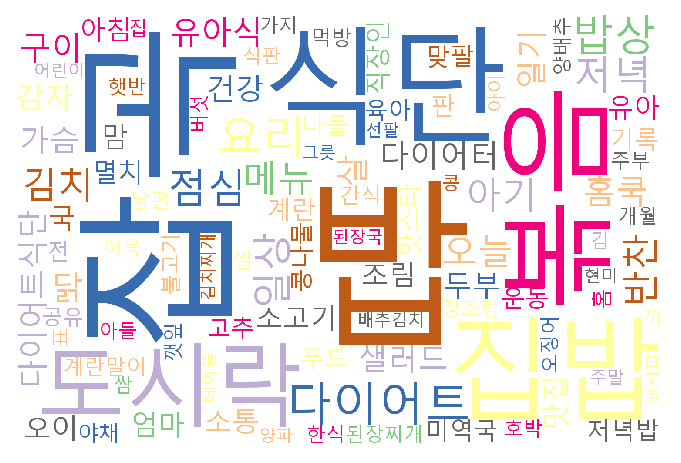

In [25]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# topic clustering
lib1 = ['아기', '엄마', '아들', '유아', '이유식'] # 맘 관련
lib2 = ['남편', '집밥'] # 집밥 
lib3 = ['다이어트', '다이어터' '닭가슴', '다이어트식단', '두부', '샐러드',] # 다이어트